In [288]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import statistics
from operator import add

In [289]:
df = pd.read_csv("Motor_Vehicle_Collisions_-_Crashes.csv")

In [290]:
df.columns

Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
      dtype='object')

In [291]:
len(df)

60514

In [292]:
# find which zip codes have the most traffic fatalities and injuries
# total number of fatalities, total number of injuries
zip_fatalities_dict = dict()
zip_injuries_dict = dict()

for row in df.iterrows():
    current_zip = row[1][3]
    # skip nans
    if math.isnan(current_zip):
        continue

    current_zip = int(current_zip)
    current_fatalities = int(row[1][12])
    current_injuries = int(row[1][11])
    
    dict_value_fatal = zip_fatalities_dict.get(current_zip)
    if dict_value_fatal:
        # add the number of fatalities to the value for the current zip code
        zip_fatalities_dict.update({current_zip: current_fatalities + dict_value_fatal})
    else:
        zip_fatalities_dict.update({current_zip: current_fatalities})


    dict_value_inj = zip_injuries_dict.get(current_zip)
    if dict_value_inj:
        # add the number of fatalities to the value for the current zip code
        zip_injuries_dict.update({current_zip: current_injuries + dict_value_inj})
    else:
        zip_injuries_dict.update({current_zip: current_injuries})

        

In [293]:
print(f"length of fatalities dict: {len(zip_fatalities_dict)}")
print(f"length of injuries dict: {len(zip_injuries_dict)}")

length of fatalities dict: 202
length of injuries dict: 202


In [294]:
# convert to lists of tuples and sort by most injuries/fatalities
fatalities = list(zip_fatalities_dict.items())
injuries = list(zip_injuries_dict.items())

In [295]:
def sort_by_second_element(lst): 
 
    return sorted(lst, key = lambda x: x[1], reverse=True)

In [296]:
fatalities = sort_by_second_element(fatalities)
injuries = sort_by_second_element(injuries)

In [297]:
print(fatalities)

[(11207, 93), (11368, 78), (11212, 78), (11226, 75), (11220, 71), (10029, 65), (11219, 64), (11208, 63), (11236, 61), (10457, 60), (11204, 59), (11234, 59), (10016, 59), (11214, 58), (11432, 58), (11229, 57), (11203, 57), (11235, 56), (11230, 56), (10002, 56), (10467, 55), (11372, 55), (11101, 54), (10458, 51), (11206, 50), (11373, 49), (10459, 49), (11385, 48), (10019, 48), (10456, 47), (11223, 46), (10036, 46), (10001, 45), (11354, 45), (11210, 44), (11434, 43), (11233, 43), (10468, 42), (11435, 42), (10460, 41), (11691, 41), (11218, 41), (11377, 40), (10011, 38), (11215, 38), (10022, 38), (10472, 37), (11201, 36), (10451, 35), (10027, 34), (11355, 34), (10455, 34), (10462, 34), (10035, 33), (10454, 33), (11211, 33), (11217, 32), (10453, 32), (10452, 31), (11213, 30), (10469, 30), (11433, 29), (11106, 29), (10017, 29), (10010, 27), (10032, 27), (11418, 27), (10023, 27), (11419, 26), (10461, 25), (10466, 25), (11420, 25), (10463, 25), (10013, 25), (11224, 25), (11225, 25), (10003, 25)

In [298]:
top_10_fatality_zip = fatalities[:10]
top_10_injury_zip = injuries[:10]

In [299]:
print(f"zip codes with the highest fatalities: {top_10_fatality_zip}")
print(f"zip codes with the highest injuries: {top_10_injury_zip}")

zip codes with the highest fatalities: [(11207, 93), (11368, 78), (11212, 78), (11226, 75), (11220, 71), (10029, 65), (11219, 64), (11208, 63), (11236, 61), (10457, 60)]
zip codes with the highest injuries: [(10002, 5), (11372, 4), (10451, 3), (11206, 3), (11220, 3), (11377, 3), (10033, 3), (11237, 3), (10468, 3), (10474, 3)]


In [300]:
median_fatality = statistics.median([tup[1] for tup in fatalities])
median_fatality

17.0

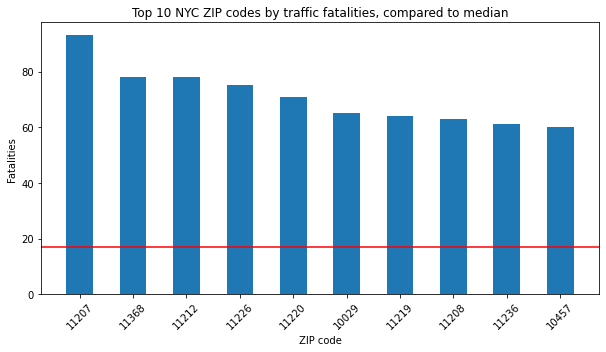

In [301]:
fig, ax = plt.subplots(figsize=(10, 5))

zips = [str(tup[0]) for tup in top_10_fatality_zip]
fatalities = [tup[1] for tup in top_10_fatality_zip]

ax.bar(zips, fatalities, width=.5)
plt.xticks(rotation=45)
plt.axhline(median_fatality, color="r")

ax.set_ylabel('Fatalities')
ax.set_xlabel("ZIP code")
ax.set_title('Top 10 NYC ZIP codes by traffic fatalities, compared to median')

plt.show()

In [302]:
# obtain granular location data
# top 10 streets for each zip code

top_10_zip_float = [float(tup[0]) for tup in top_10_fatality_zip]

string_arg = ""
for flt in top_10_zip_float:
    string_arg += ("`ZIP CODE` == " + str(flt) + " | ")

string_arg = string_arg[:-3]
string_arg

'`ZIP CODE` == 11207.0 | `ZIP CODE` == 11368.0 | `ZIP CODE` == 11212.0 | `ZIP CODE` == 11226.0 | `ZIP CODE` == 11220.0 | `ZIP CODE` == 10029.0 | `ZIP CODE` == 11219.0 | `ZIP CODE` == 11208.0 | `ZIP CODE` == 11236.0 | `ZIP CODE` == 10457.0'

In [303]:
reduced_df = df.query(string_arg)

In [304]:
# get on street name for each zip
# 11207
df["ZIP CODE"].value_counts()

11207.0    1023
11236.0     702
11208.0     694
11212.0     638
11226.0     614
           ... 
10153.0       1
10178.0       1
10041.0       1
10152.0       1
10112.0       1
Name: ZIP CODE, Length: 202, dtype: int64

In [305]:
# size of fatality
sub_df = df[["ZIP CODE", "NUMBER OF PERSONS KILLED"]]
sub_df = sub_df[df["NUMBER OF PERSONS KILLED"] > 0]
sub_df = sub_df.sort_values("NUMBER OF PERSONS KILLED")
print(sub_df.value_counts())

ZIP CODE  NUMBER OF PERSONS KILLED
11372.0   1                           4
11206.0   1                           3
11220.0   1                           3
10033.0   1                           3
11377.0   1                           3
                                     ..
11101.0   1                           1
11103.0   1                           1
10002.0   4                           1
11106.0   1                           1
11434.0   1                           1
Length: 70, dtype: int64


In [306]:
sizes = pd.DataFrame(sub_df)

In [307]:
# how many accidents have 0 fatalities?
df.value_counts("NUMBER OF PERSONS KILLED")

NUMBER OF PERSONS KILLED
0    60346
1      161
2        6
4        1
dtype: int64

In [308]:
length = len(df)

print(f"{60346 / length * 100} percent of collisions have 0 fatalities")

99.7223782926265 percent of collisions have 0 fatalities


In [309]:
# what is the most common time for an accident?
times = reduced_df["CRASH TIME"].tolist()

In [310]:
times = [time.split(":")[0] for time in times]
print(len(times))

5903


In [311]:
time_series = pd.Series(times)
time_df = pd.DataFrame(time_series.value_counts())

time_df

,0
17,358
15,351
16,344
14,333
18,324
19,323
8,309
13,292
0,288
20,279


In [312]:
times = list(time_df.index)
collisions = list(time_df[0])

In [313]:
times = [int(time) for time in times]
times

[17,
 15,
 16,
 14,
 18,
 19,
 8,
 13,
 0,
 20,
 9,
 22,
 21,
 12,
 10,
 11,
 23,
 7,
 6,
 1,
 5,
 2,
 4,
 3]

In [314]:
collisions

[358,
 351,
 344,
 333,
 324,
 323,
 309,
 292,
 288,
 279,
 275,
 255,
 253,
 252,
 240,
 226,
 211,
 204,
 157,
 152,
 138,
 124,
 114,
 101]

In [315]:
hour_data = list(zip(times, collisions))

def sort_by_first_element(lst): 
 
    return sorted(lst, key = lambda x: x[0], reverse=False)

hour_data = sort_by_first_element(hour_data)
hour_data

[(0, 288),
 (1, 152),
 (2, 124),
 (3, 101),
 (4, 114),
 (5, 138),
 (6, 157),
 (7, 204),
 (8, 309),
 (9, 275),
 (10, 240),
 (11, 226),
 (12, 252),
 (13, 292),
 (14, 333),
 (15, 351),
 (16, 344),
 (17, 358),
 (18, 324),
 (19, 323),
 (20, 279),
 (21, 253),
 (22, 255),
 (23, 211)]

In [316]:
times = [tup[0] for tup in hour_data]
collisions = [tup[1] for tup in hour_data]

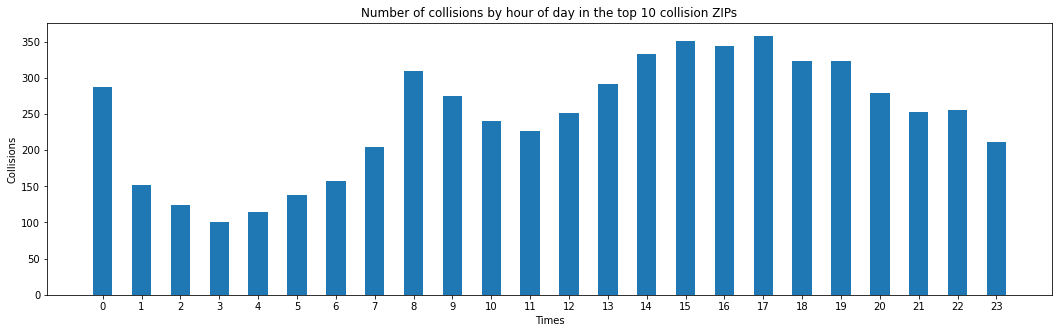

<Figure size 432x288 with 0 Axes>

In [317]:
fig, ax = plt.subplots(figsize=(18, 5))

ax.bar(times, collisions, width=.5, tick_label=times)
# plt.xticks(rotation=45)
# plt.axhline(68, color="r")
f = plt.figure()

ax.set_ylabel('Collisions')
ax.set_xlabel("Times")
ax.set_title('Number of collisions by hour of day in the top 10 collision ZIPs')

plt.show()